# Preprocessing
- cleaning data
- converting data
- save train data

I try to use new packages and new methods for top goals.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud_fa import WordCloudFa
import string

# Avoiding warnings
import warnings
import os
########### Prevent Warnings ###########
warnings.filterwarnings(action='ignore')
########### Prevent Warnings ###########

Lets load and explorer data

In [2]:
df = pd.read_csv('comments.csv', index_col=None)
df.head()

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]"
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,786887,6,11,verified,no_idea,گوشی مقرون به صرفه,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...,"[""صفحه نمایش پرنور و با کیفیت\r"",""کیفیت بالای ...","[""کیفیت پایین اسپیکر\r"",""حاشیه خالی زیر صفحه ن..."
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,854531,19,4,verified,no_idea,ابعاد، استحکام و نگهداری شارژ مناسب,اگر ظرفیتش براتون کافیه حتما بخرید._x000D_\nیه...,"[""ظریف و زیبا و باریک\r"",""بدنه محکم و با دوام""]","[""ظرفیت متوسط""]"


In [3]:
df.dtypes

product_id              int64
product_title          object
title_en               object
user_id                 int64
likes                   int64
dislikes                int64
verification_status    object
recommend              object
title                  object
comment                object
advantages             object
disadvantages          object
dtype: object

In [4]:
df.describe()

,product_id,user_id,likes,dislikes
count,100000.000000,1.000000e+05,100000.000000,100000.000000
mean,426482.510140,4.642959e+06,3.114790,1.649460
std,232470.511159,2.619034e+06,8.050031,8.912705
min,300.000000,4.661320e+05,0.000000,0.000000
25%,220871.250000,2.613059e+06,0.000000,0.000000
50%,427858.000000,4.710290e+06,1.000000,0.000000
75%,619397.250000,7.094806e+06,4.000000,1.000000
max,909423.000000,8.623288e+06,854.000000,1344.000000


I ignore this now

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum().sum()

127025

Creating new dataframe that recommend column includes **recommended**, **not_recommended**


In [7]:
df_recommended = df[ (df['recommend']=='recommended' ) | (df['recommend']=='not_recommended') ]
df_recommended.head()

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]"
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN
5,133722,لپ تاپ 15 اینچی ایسوس مدل N501VW - A,IT,497032,6,1,verified,recommended,اقرار بیش از حد در ایراد گرفتن,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...,"[""همه چیز که تو مشخصات اومده بجز 3 مورد کوچیک""]","[""تاچ پدش میتونست بهتر باشه از نظر سرعت پاسخ گ..."
6,148509,اسپیکر بلوتوثی دیووم مدل Bluetune bean,IT,574130,3,0,verified,recommended,بسیار خوب,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,"[""کیفیت ساخت بسیار خوب\r"",""کیفیت صدا بسیار عال...","[""ندارد""]"
10,5107,هارددیسک اکسترنال سیگیت مدل Backup Plus Deskto...,IT,794316,1,0,verified,recommended,هارد با کیفیت و ظاهر شیک,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,"[""کیفیت ساخت خوب\r"",""ظاهر ساده و زیبا\r"",""صدای...","[""عدم مقاومت در برابر ضربه\r"",""عدم سهولت جا به..."


In [8]:
df_recommended.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53082 entries, 1 to 99997
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           53082 non-null  int64 
 1   product_title        53082 non-null  object
 2   title_en             53082 non-null  object
 3   user_id              53082 non-null  int64 
 4   likes                53082 non-null  int64 
 5   dislikes             53082 non-null  int64 
 6   verification_status  53082 non-null  object
 7   recommend            53082 non-null  object
 8   title                51417 non-null  object
 9   comment              53058 non-null  object
 10  advantages           22160 non-null  object
 11  disadvantages        18422 non-null  object
dtypes: int64(4), object(8)
memory usage: 5.3+ MB


Lets look **likes** in distplot

<AxesSubplot:xlabel='likes', ylabel='Density'>

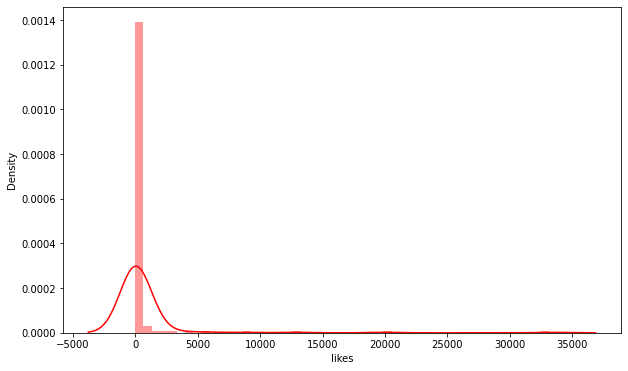

In [9]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.distplot(a=df['likes'].value_counts(), kde=True, norm_hist= True, color='r')



<BarContainer object of 151 artists>

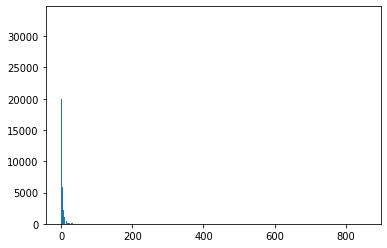

In [10]:
plt.figure()
plt.bar(df['likes'].value_counts().index, df['likes'].value_counts())

### Creating new dataframe that Includes ['comment', 'recommend']

In [11]:
train = df_recommended[['comment', 'recommend']]
train.head()

,comment,recommend
1,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,recommended
2,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,not_recommended
5,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...,recommended
6,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,recommended
10,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,recommended


Resetting indexes

In [12]:
train.reset_index(drop=True, inplace=True)
train.head(10)

,comment,recommend
0,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,recommended
1,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,not_recommended
2,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...,recommended
3,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,recommended
4,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,recommended
5,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...,recommended
6,من این پاور بانک رو حدود یک سال پیش از دیجی کا...,recommended
7,با توجه به قدرت خنک کنندگی حداقل ۲ ساعت زمان ل...,recommended
8,سلام و خسته نباشید به تمامی کارکنان و بازدید ک...,not_recommended
9,بهترین روغن موتور برای موتورهای پژو همین روغنه...,recommended


Defining the function to remove punctuation

In [13]:
def remove_punctuation(text):
    text = str(text)
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
train['clean_comment']= train['comment'].apply(lambda x:remove_punctuation(x))
train = train[['clean_comment','recommend']]
train.head(10)

,clean_comment,recommend
0,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,recommended
1,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,not_recommended
2,سلام دوستان،،x000D\nمنم مثه بعضی از دوستان قبل...,recommended
3,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,recommended
4,نزدیک به دو ساله که این هارد رو خریدم استفاده ...,recommended
5,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...,recommended
6,من این پاور بانک رو حدود یک سال پیش از دیجی کا...,recommended
7,با توجه به قدرت خنک کنندگی حداقل ۲ ساعت زمان ل...,recommended
8,سلام و خسته نباشید به تمامی کارکنان و بازدید ک...,not_recommended
9,بهترین روغن موتور برای موتورهای پژو همین روغنه...,recommended


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53082 entries, 0 to 53081
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  53082 non-null  object
 1   recommend      53082 non-null  object
dtypes: object(2)
memory usage: 829.5+ KB


In [15]:
train['recommend'].astype('str') 
train.head()

,clean_comment,recommend
0,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,recommended
1,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,not_recommended
2,سلام دوستان،،x000D\nمنم مثه بعضی از دوستان قبل...,recommended
3,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,recommended
4,نزدیک به دو ساله که این هارد رو خریدم استفاده ...,recommended


In [16]:
recommended_map = {'recommended': 1, 'not_recommended': 0}
train['recommend'] = train['recommend'].map(recommended_map)
# train['recommend'] = train['recommend'].astype(int)
train.head()

,clean_comment,recommend
0,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,1
1,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,0
2,سلام دوستان،،x000D\nمنم مثه بعضی از دوستان قبل...,1
3,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,1
4,نزدیک به دو ساله که این هارد رو خریدم استفاده ...,1


### Lets look word cloud of comments

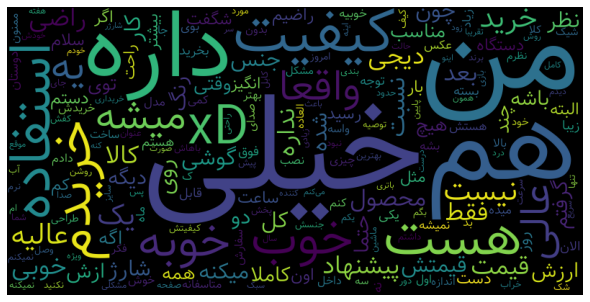

In [17]:
wcloud = WordCloudFa(no_reshape=False, persian_normalize=True, include_numbers=False, collocations=False, width=800, height=400)
text = ""
all_words = ' '.join(train['clean_comment'])
wc = wcloud.generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [18]:
train.to_csv('train.csv')